In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2015-01-01'
end = '2024-12-31'

df = yf.download('AAPL', start=start, end=end)
df.head()

C:\Users\Anushi\AppData\Local\Temp\ipykernel_6756\239773890.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288584,24.757338,23.848709,24.746230,212818400
2015-01-05,23.604332,24.137513,23.417720,24.057535,257142000
2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600
2015-01-08,24.857300,24.915061,24.148614,24.266359,237458000


In [3]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100
2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300
2024-12-30,251.593079,252.889953,250.146571,251.623005,35557500


In [4]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.288584,24.757338,23.848709,24.746230,212818400
1,2015-01-05,23.604332,24.137513,23.417720,24.057535,257142000
2,2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
3,2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600
4,2015-01-08,24.857300,24.915061,24.148614,24.266359,237458000


In [5]:
df = df.drop(['Date'], axis=1)
df.head()

C:\Users\Anushi\AppData\Local\Temp\ipykernel_6756\2218488136.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.288584,24.757338,23.848709,24.746230,212818400
1,23.604332,24.137513,23.417720,24.057535,257142000
2,23.606552,23.866477,23.244433,23.668756,263188400
3,23.937572,24.037543,23.704305,23.815385,160423600
4,24.857300,24.915061,24.148614,24.266359,237458000


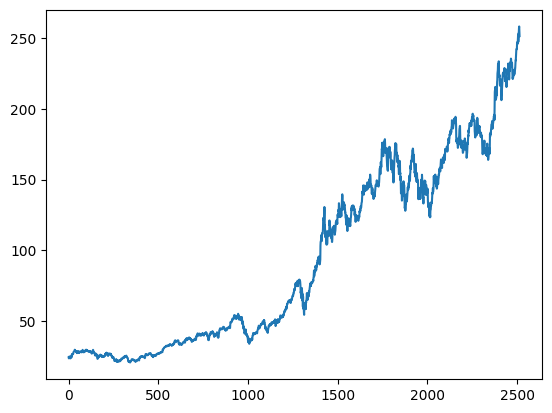

In [6]:
plt.plot(df['Close'])

In [7]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.288584,24.757338,23.848709,24.746230,212818400
1,23.604332,24.137513,23.417720,24.057535,257142000
2,23.606552,23.866477,23.244433,23.668756,263188400
3,23.937572,24.037543,23.704305,23.815385,160423600
4,24.857300,24.915061,24.148614,24.266359,237458000
...,...,...,...,...,...
2510,254.655716,255.034791,252.840088,254.156919,40858800
2511,257.578674,257.588630,254.675658,254.875189,23234700
2512,258.396667,259.474086,257.010028,257.568678,27237100


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,228.669739
2511,229.057160
2512,229.558168
2513,230.045264


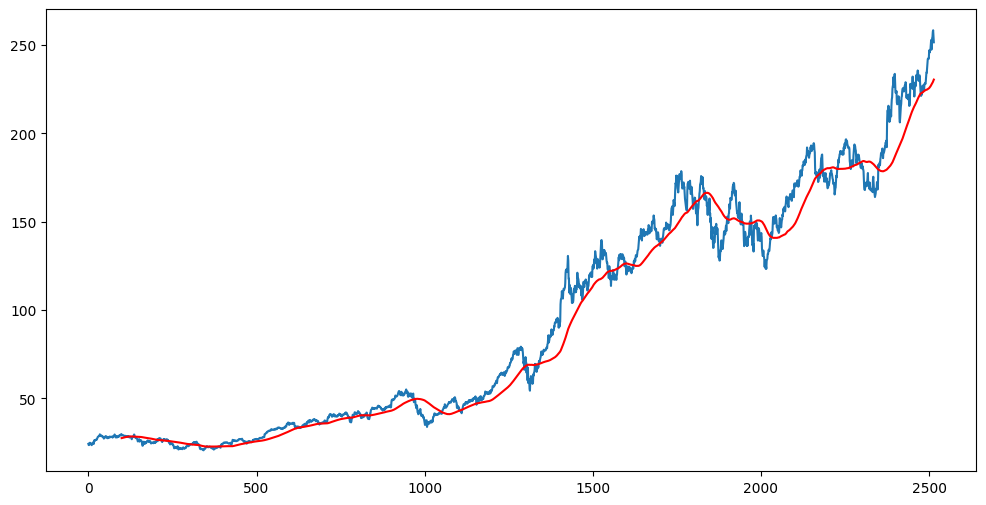

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,210.476669
2511,210.905997
2512,211.337030
2513,211.761392


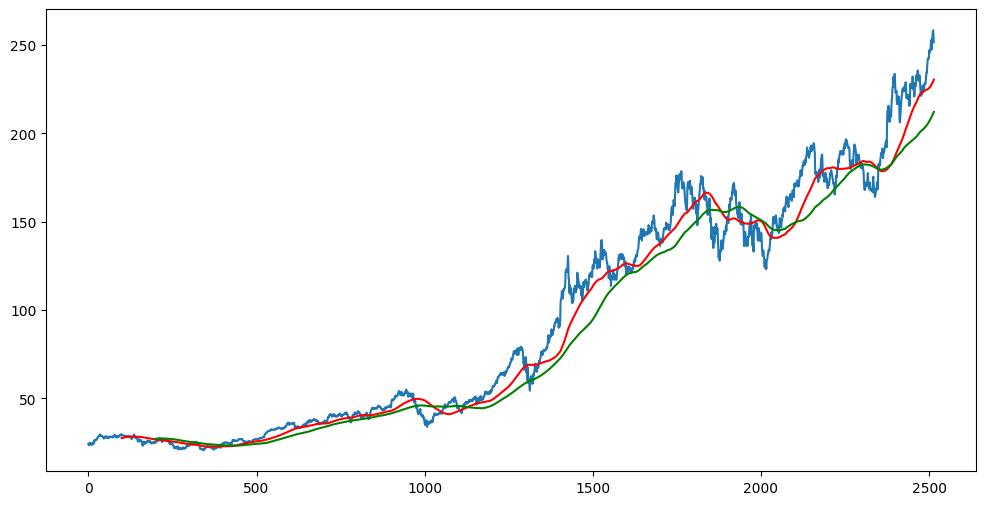

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape


(2515, 5)

In [13]:
#Splitting data into training and testing sets

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [14]:
data_training.head()

Ticker,AAPL
0,24.288584
1,23.604332
2,23.606552
3,23.937572
4,24.857300


In [15]:
data_testing.head()

Ticker,AAPL
1760,176.064270
1761,174.906082
1762,174.287766
1763,178.645676
1764,176.378342


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02328845],
       [0.01891202],
       [0.01892622],
       ...,
       [0.97457523],
       [1.        ],
       [0.99347133]])

In [18]:
data_training_array.shape

(1760, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i, 0])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
# ML model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [21]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Users\Anushi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 153ms/step - loss: 0.0504
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - loss: 0.0051
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - loss: 0.0051
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - loss: 0.0064
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - loss: 0.0037
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - loss: 0.0040
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 0.0038
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - loss: 0.0036
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - loss: 0.0035
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - loss: 0.0037
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - loss: 0.0034
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - loss: 0.0032
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - loss: 0.0026
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - loss: 0.0038
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step 

In [24]:
model.save('keras_model.h5')

In [25]:
data_testing.head()

Ticker,AAPL
1760,176.064270
1761,174.906082
1762,174.287766
1763,178.645676
1764,176.378342


In [26]:
past_100_days = data_training.tail(100)

In [27]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [28]:
final_df.head()

Ticker,AAPL
0,143.229645
1,143.180649
2,142.700424
3,142.955215
4,145.924896


In [29]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(855, 1)

In [30]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [31]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [32]:
# Making predictions
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step


In [33]:
y_predicted.shape

(755, 1)

In [34]:
y_test

array([3.90019284e-01, 3.81438552e-01, 3.76857594e-01, 4.09144291e-01,
       3.92346165e-01, 3.57586981e-01, 3.36353278e-01, 3.37589352e-01,
       3.37734845e-01, 3.58750591e-01, 3.62022671e-01, 3.37734845e-01,
       3.44134191e-01, 3.20355197e-01, 2.94395155e-01, 2.81887451e-01,
       2.66616726e-01, 2.60871932e-01, 2.47491606e-01, 2.46837280e-01,
       2.43419480e-01, 3.24209365e-01, 3.56568752e-01, 3.55332678e-01,
       3.64277087e-01, 3.42897664e-01, 3.40786368e-01, 3.35471272e-01,
       3.58552303e-01, 3.69109805e-01, 3.38820564e-01, 3.13482290e-01,
       3.15229910e-01, 3.43698727e-01, 3.41951447e-01, 3.15229910e-01,
       3.03725739e-01, 2.82028310e-01, 2.51083614e-01, 2.70524026e-01,
       2.85887113e-01, 2.87853029e-01, 2.73873319e-01, 2.98337614e-01,
       2.95935217e-01, 2.73654796e-01, 2.45477192e-01, 2.31934415e-01,
       2.72053122e-01, 2.39797853e-01, 2.12202676e-01, 1.82277339e-01,
       2.14823483e-01, 2.47588715e-01, 2.55088136e-01, 2.79552657e-01,
      

In [35]:
y_predicted

array([[0.35166407],
       [0.35488838],
       [0.35881793],
       [0.36294687],
       [0.3672886 ],
       [0.37166584],
       [0.3752107 ],
       [0.37689352],
       [0.37620094],
       [0.3733009 ],
       [0.36915022],
       [0.3647248 ],
       [0.3603238 ],
       [0.3561788 ],
       [0.3521041 ],
       [0.34765887],
       [0.34255764],
       [0.33670062],
       [0.3302415 ],
       [0.32342136],
       [0.31650653],
       [0.30973947],
       [0.30379397],
       [0.2994198 ],
       [0.2972971 ],
       [0.2978803 ],
       [0.30098954],
       [0.30604133],
       [0.31214747],
       [0.31879666],
       [0.32579133],
       [0.33234754],
       [0.33731335],
       [0.3401025 ],
       [0.34118164],
       [0.34118807],
       [0.34025928],
       [0.33835202],
       [0.33532596],
       [0.33101818],
       [0.32577103],
       [0.32018355],
       [0.31478176],
       [0.30982727],
       [0.305643  ],
       [0.30242288],
       [0.3000256 ],
       [0.298

In [36]:
scaler.scale_

array([0.00740876])

In [37]:
scale_factor = 1 / 0.00996625
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

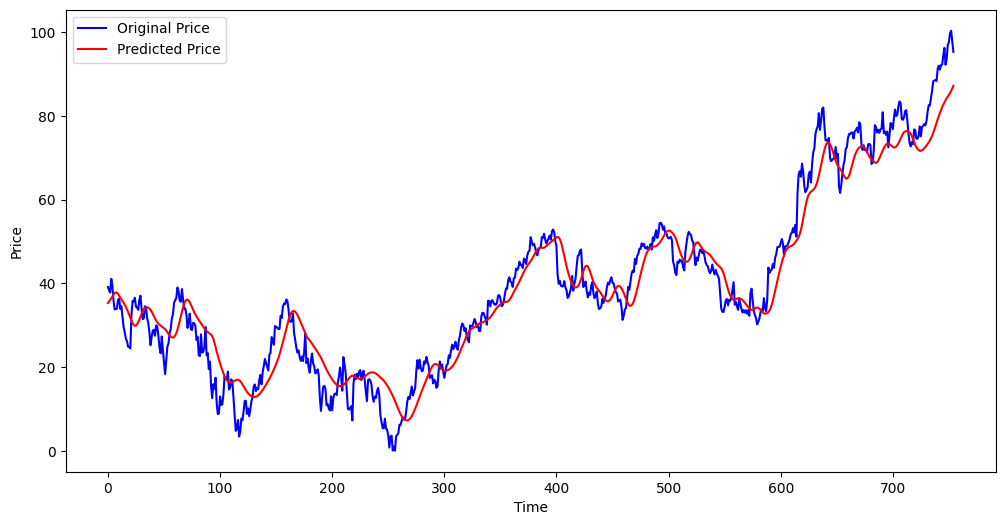

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()